<a href="https://colab.research.google.com/github/MukundcMenon/Learning_AI/blob/main/Application_of_ANN__Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
# Independant Features
X = dataset.iloc[:,3:13]

# Dependant Features
y = dataset.iloc[:,13]

In [ ]:
# Feature Engineering
"""
The Column Geography is a catergorical feature, hence it can be one-hot-encoded
Since there are only 3 categories, the training requires to keep only 2 of them
"""

geography = pd.get_dummies(X['Geography'], drop_first=True, dtype=int)
gender = pd.get_dummies(X['Gender'], drop_first=True, dtype=int)

X = X.drop(['Geography','Gender'], axis=1, inplace=False)
X = pd.concat([X,geography,gender], axis=1)

In [ ]:
# Splitting to train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
# Input Layer
classifier.add(Dense(units = 11,activation='relu'))

# First Hidden Layer
classifier.add(Dense(units = 6,activation='relu'))
classifier.add(Dropout(0.3))

# Second Hidden Layer
classifier.add(Dense(units = 6,activation='relu'))
classifier.add(Dropout(0.3))

# Output Layer
classifier.add(Dense(units = 1,activation='sigmoid'))

In [ ]:
# Changing the default learning rate from 0.1 to 0.01

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
classifier.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Add Early Stopping to reduce number of epochs
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model_history = classifier.fit(
    X_train,
    y_train,
    validation_split = 0.33,
    batch_size = 10,
    epochs = 500,
    callbacks=[early_stopping]
)

Epoch 1/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7740 - loss: 0.5342 - val_accuracy: 0.7963 - val_loss: 0.4456
Epoch 2/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8067 - loss: 0.4522 - val_accuracy: 0.8402 - val_loss: 0.3808
Epoch 3/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8300 - loss: 0.4057 - val_accuracy: 0.8186 - val_loss: 0.3929
Epoch 4/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8264 - loss: 0.4041 - val_accuracy: 0.8466 - val_loss: 0.3786
Epoch 5/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8385 - loss: 0.4010 - val_accuracy: 0.8432 - val_loss: 0.3714
Epoch 6/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8480 - loss: 0.3748 - val_accuracy: 0.8493 - val_loss: 0.3775
Epoch 7/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8343 - loss: 0.3867 - val_accuracy: 0.8474 - val_loss: 0.3691
Epoch 8/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8465 - loss: 0.3727 - val_accu

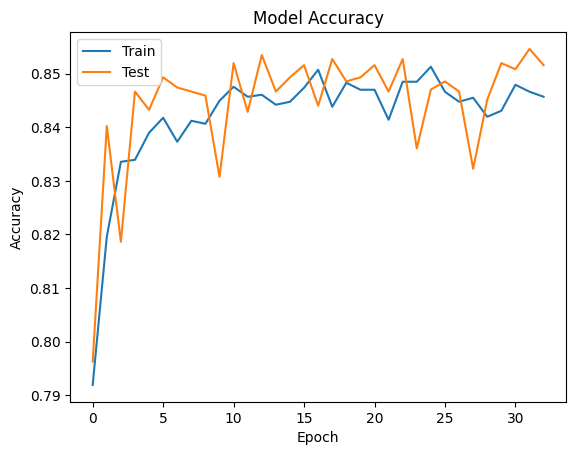

In [ ]:
model_history.history.keys()

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')

In [ ]:
# Create Prediction

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
# Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1517,   78],
       [ 206,  199]])